# Data Understanding

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/smoker_train.csv")

## Allgemeine Analyse

In [ ]:
df.head()

In [ ]:
df.info()

## Merkmale

### Personendaten

In [ ]:
# Smoking
smoking_counts = df["smoking"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])
plt.tight_layout()
plt.show()

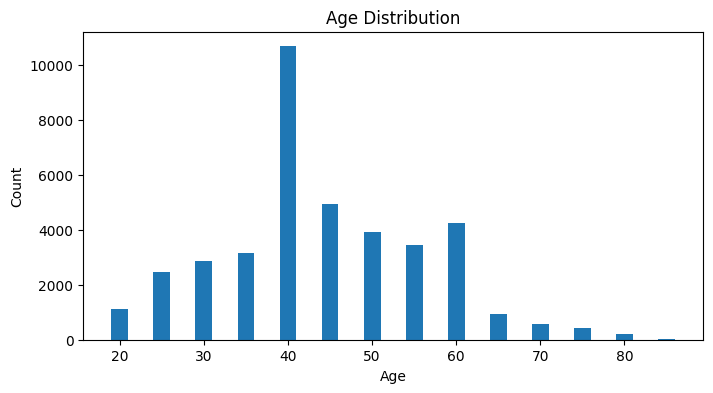

In [12]:
# Age
plt.figure(figsize=(8, 4))
age_count = df['age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values, width=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

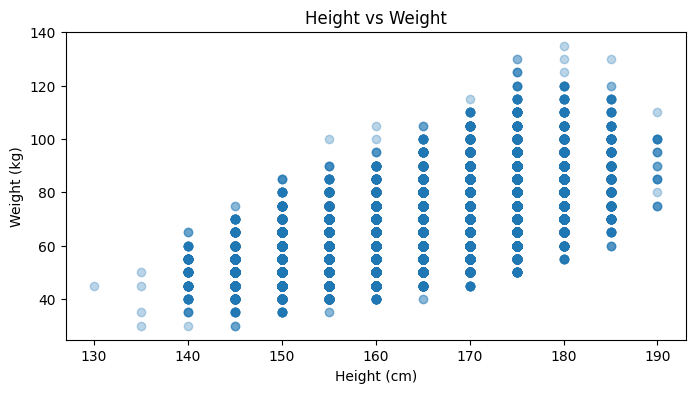

In [13]:
# Scatter plot: height vs weight
plt.figure(figsize=(8, 4))
plt.scatter(df['height(cm)'], df['weight(kg)'], alpha=0.3)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

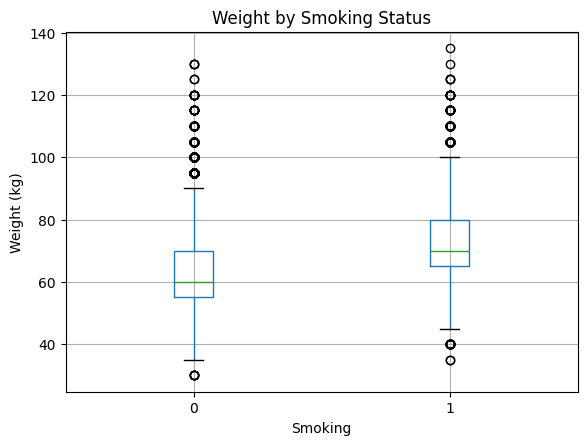

In [ ]:
# Boxplot of weight by smoking status
df.boxplot(column='weight(kg)', by='smoking')
plt.title('Weight by Smoking Status')
plt.suptitle('')
plt.xlabel('Smoking')
plt.ylabel('Weight (kg)')
plt.show()

### Leberwerte

In [ ]:
df_urine = pd.read_csv("data/smoker_train.csv", usecols=["Urine protein"])
urine_counts = df_urine["Urine protein"].value_counts().sort_index()
print(urine_counts)

## Korrelation

### "Simple" Korrelationen

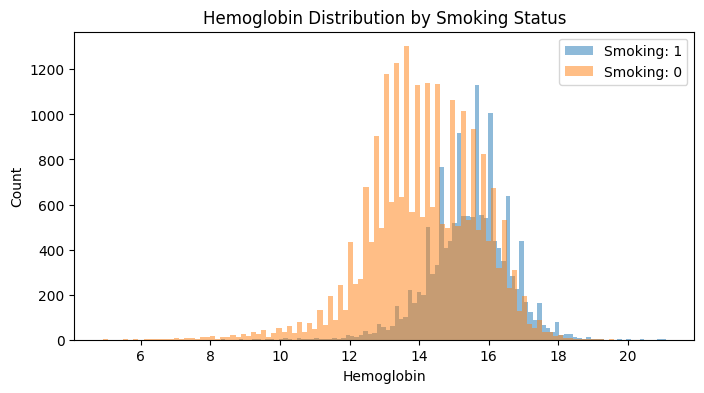

In [ ]:
# Hemoglobin - Smoking
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['hemoglobin'], bins=100, alpha=0.5, label=f'Smoking: {status}')
plt.title('Hemoglobin Distribution by Smoking Status')
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.legend()
plt.show()

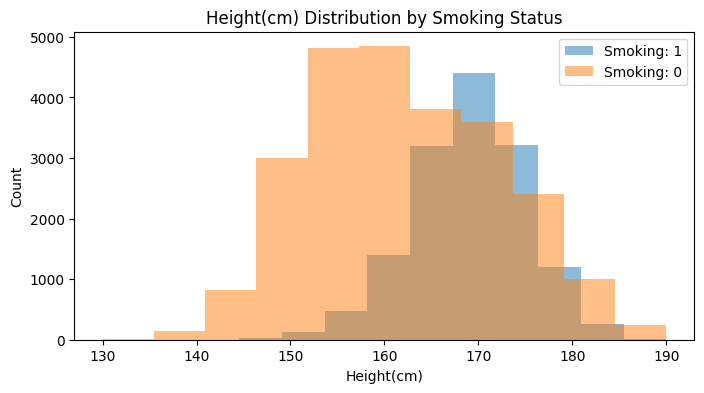

In [21]:
# Hemoglobin - Height
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['height(cm)'], bins=11, alpha=0.5, label=f'Smoking: {status}')
plt.title('Height(cm) Distribution by Smoking Status')
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.legend()
plt.show()

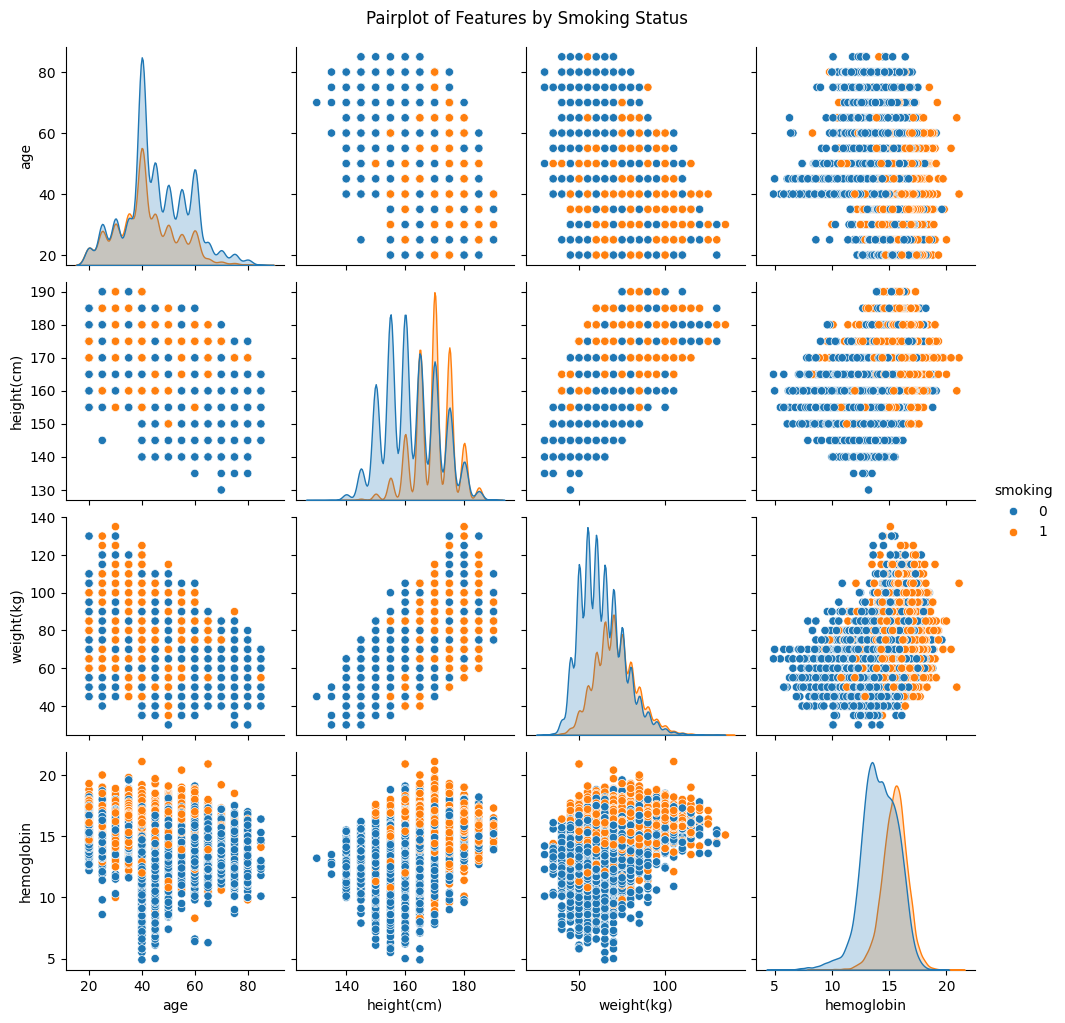

In [25]:
# Pairplot 
sns.pairplot(df, hue='smoking', vars=['age', 'height(cm)', 'weight(kg)', 'hemoglobin'])
plt.suptitle('Pairplot of Features by Smoking Status', y=1.02)
plt.show()

## Benfords Law Factory

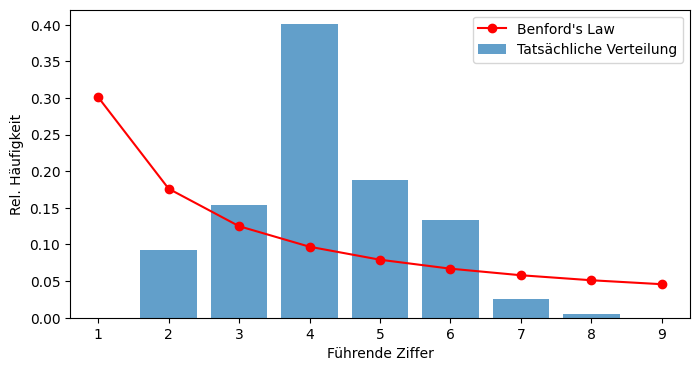

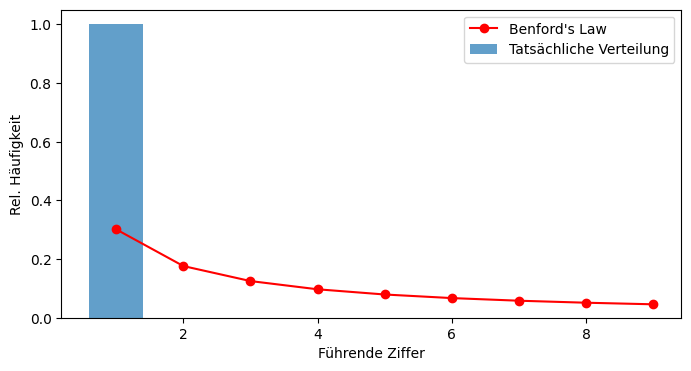

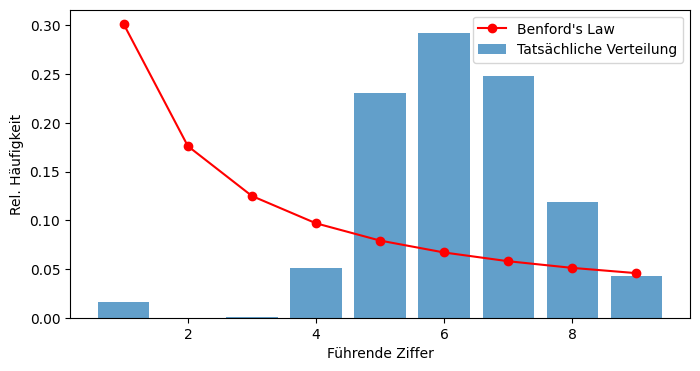

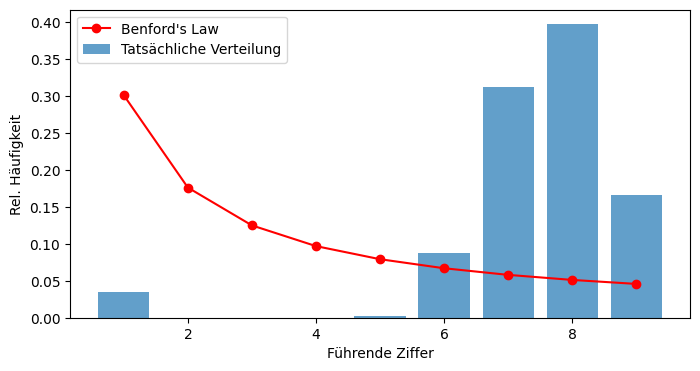

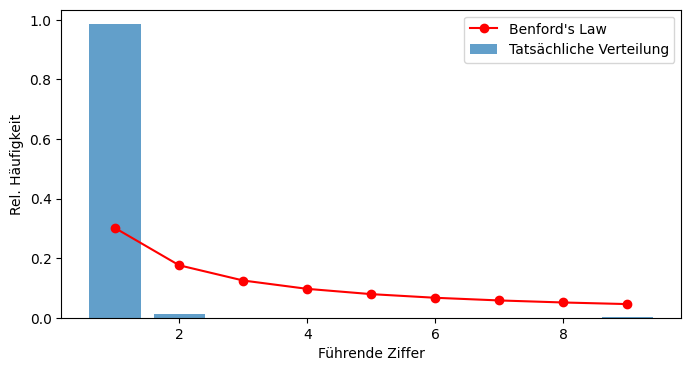

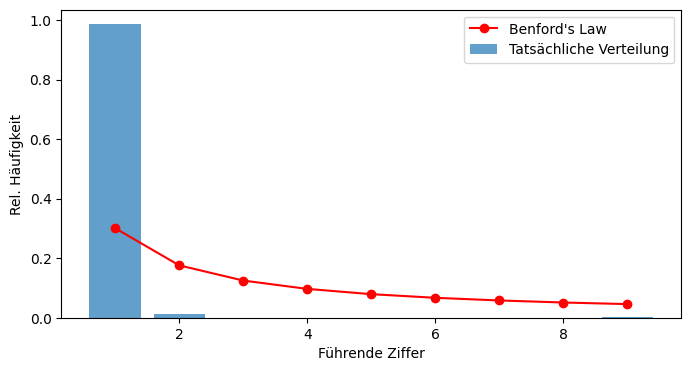

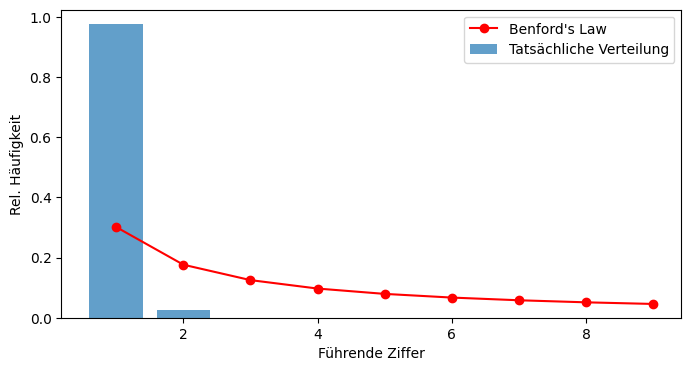

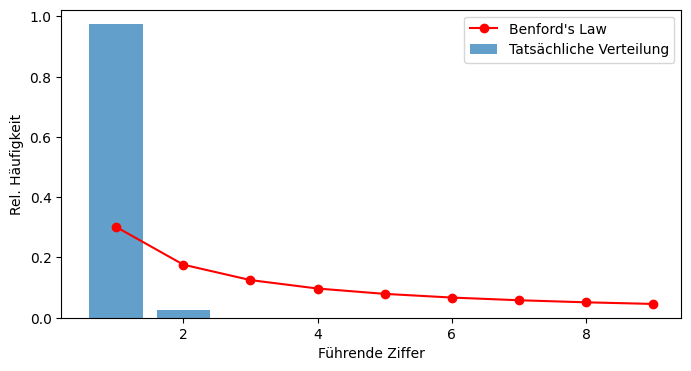

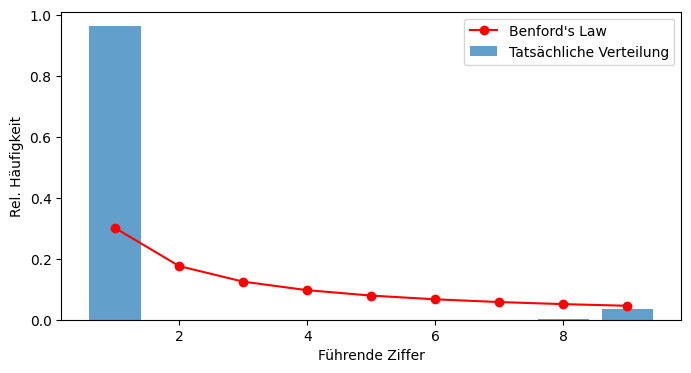

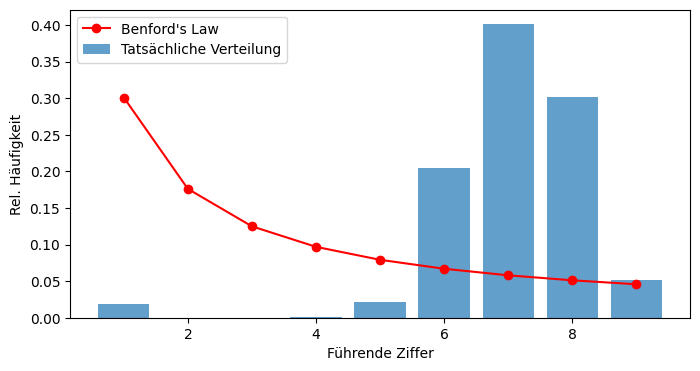

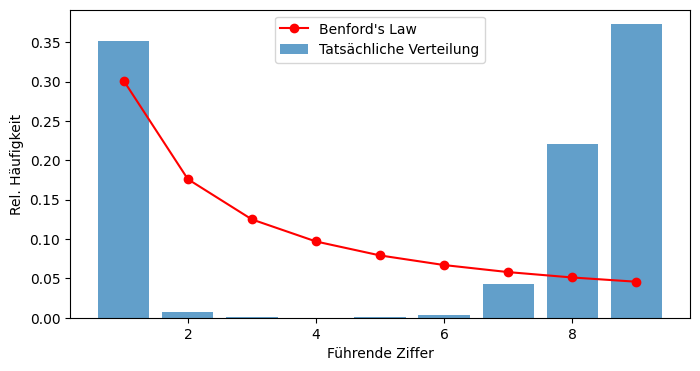

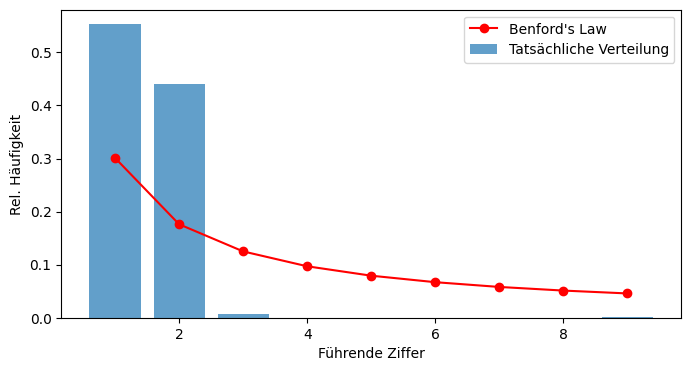

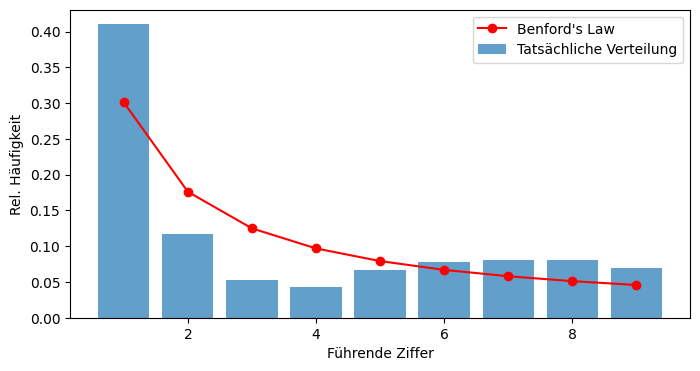

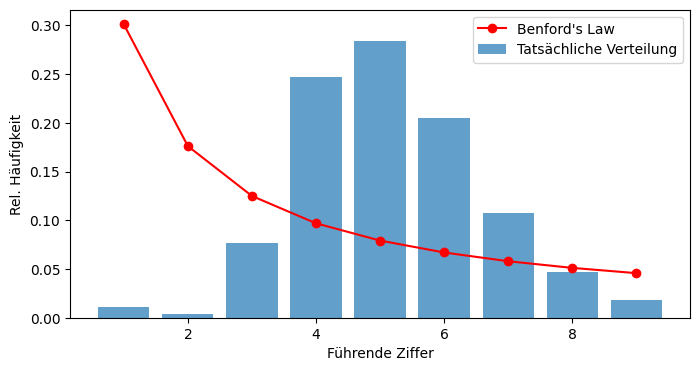

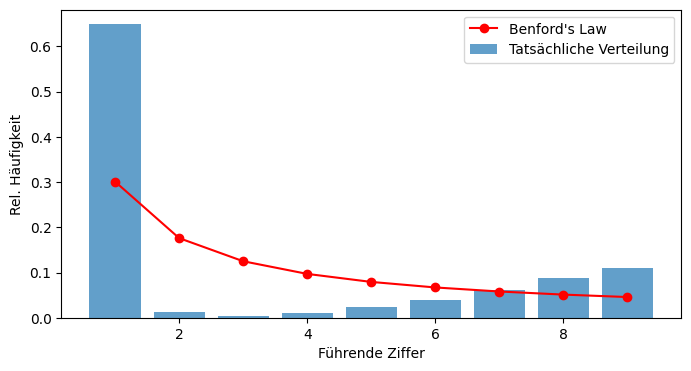

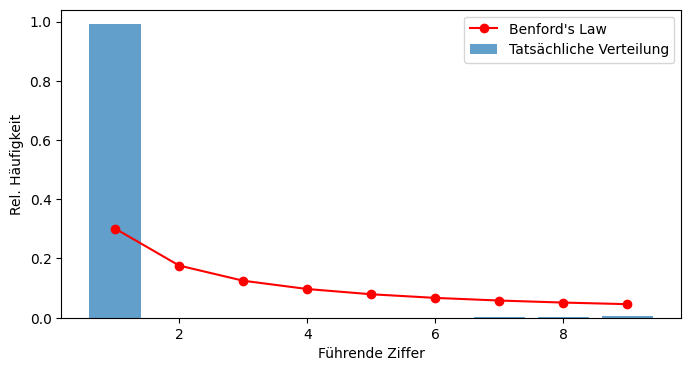

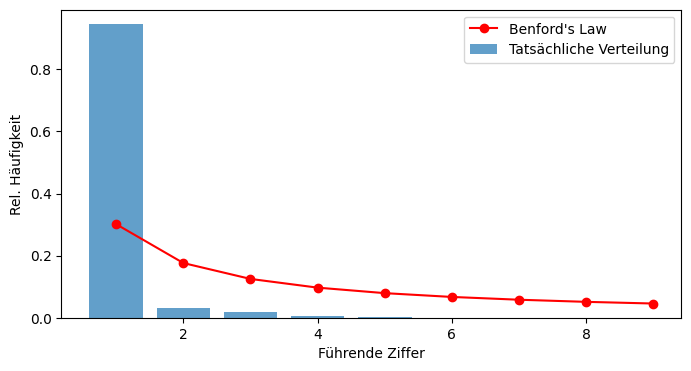

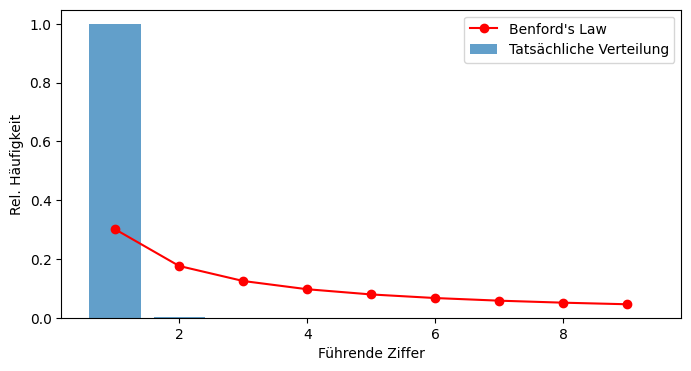

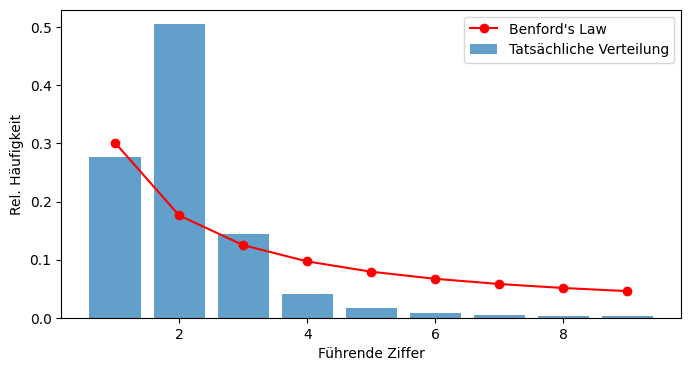

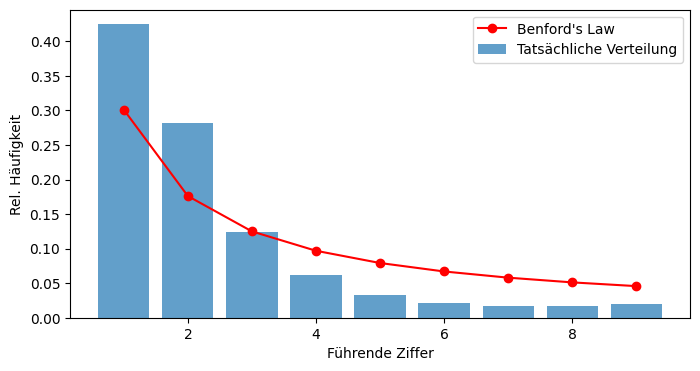

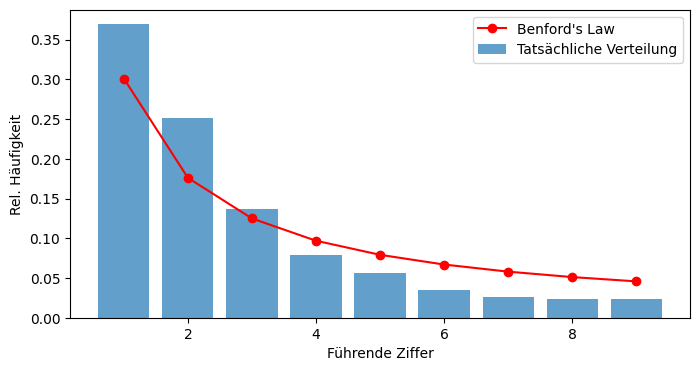

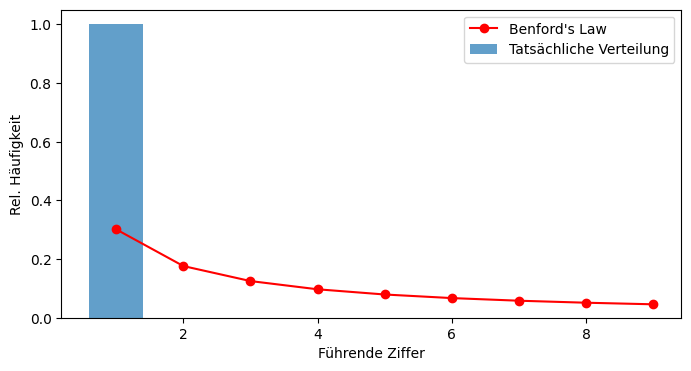

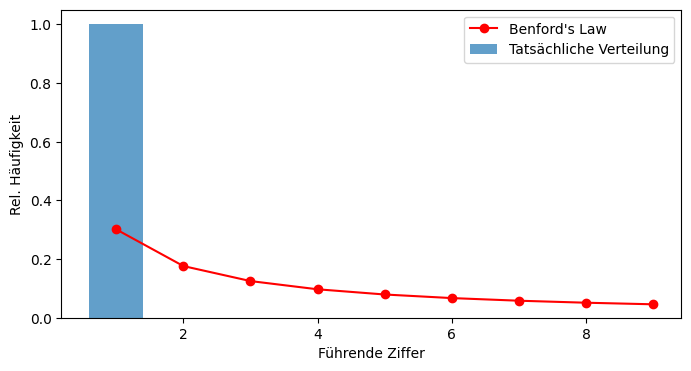

In [19]:
benford_freq = np.log10(1 + 1 / np.arange(1, 10))

for col in df.columns:
    if df[col].dtype.kind in 'biufc':  # numeric columns only
        values = df[col].dropna().astype(str)
        leading_digits = values.str.lstrip('0').str.extract(r'^(\d)').dropna()[0].astype(int)
        observed_counts = leading_digits.value_counts().sort_index()
        observed_freq = observed_counts / observed_counts.sum()

        plt.figure(figsize=(8, 4))
        plt.bar(observed_freq.index, observed_freq.values, alpha=0.7, label='Tatsächliche Verteilung')
        plt.plot(np.arange(1, 10), benford_freq, 'ro-', label="Benford's Law")
        plt.xlabel('Führende Ziffer')
        plt.ylabel('Rel. Häufigkeit')
        # plt.title(f"Leading Digit Distribution vs Benford's Law ('{col}')")
        plt.legend()
        plt.show()
